# **Abstract**

To Interpreting a linear model and tree based model I will be using IKEA data set to perform regression for linear model and classification for tree based model. Auto ML to check which model fits better for both the cases. Using Sharp analysis compare the interpretation made before.




*   About the Data Set
*   Linear Reggression and its Interpretation
*   Regression Trees and it Interpretation
*   Auto ML for best model and its Interpretation
*   Shap Analysis for Linear Reggression model Interpretation
*   Shap Analysis for Regression Trees model Interpretation
*   Shap Analysis for Model Interpretation from Auto ML
*   Conclusion




# **About Data Set**

>IKEA is a Swedish multinational conglomerate based in the Netherlands that designs and sells ready-to-assemble furniture, kitchen appliances, home accessories, and various other goods and home services. 

> Large verity of furniture are sold by Ikea so it has both numerical and categorical data and I will be using binary classification, multiclass classification, regression models.

> The dataset contained 3543 observations of 11 variables.

> Variables : 

> 1. Depth
> 2. Height
> 3. Width
> 4. Old_price
> 5. Sellable_online
> 6. Other_colors
> 7. Short_description
> 8. Name
> 9. Category
> 10. Price
> 11. Designer



# Linear Reggression and its Interpretation

In [ ]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [ ]:
# Import dataset
#path ='dataset/'
path = '../input/'
df_reg = pd.read_csv("/content/IKEA_SA_Furniture_Web_Scrapings_sss.csv")
print('\nNumber of rows and columns in the data set: ',df_reg.shape)
print('')

#Lets look into top few rows and columns in the dataset
df_reg.head()


Number of rows and columns in the data set:  (3543, 11)



depth  height  width  old_price  sellable_online other_colors  \
0   44.0   103.0   52.0          0             True           No   
1   45.0   102.0   40.0          0             True           No   
2   47.0   103.0   46.0          0             True           No   
3   53.0   104.0   43.0        295             True           No   
4   52.0   114.0   43.0          0             True           No   

                                   short_description              designer  \
0          Bar stool with backrest, foldable,    ...   K Hagberg/M Hagberg   
1            Bar stool with backrest,          74 cm          Carina Bengs   
2            Bar stool with backrest,          74 cm         Nike Karlsson   
3          Bar stool with backrest, in/outdoor,  ...  Nicholai Wiig Hansen   
4            Bar stool with backrest,          75 cm       Ehlén Johansson   

       name       category  price  
0  FRANKLIN  Bar furniture  149.0  
1    INGOLF  Bar furniture  395.0  
2  NORRARYD  Bar furniture  395.0  
3  FREKVENS  Bar furniture  177.0  
4  EKEDALEN  Bar furniture  345.0

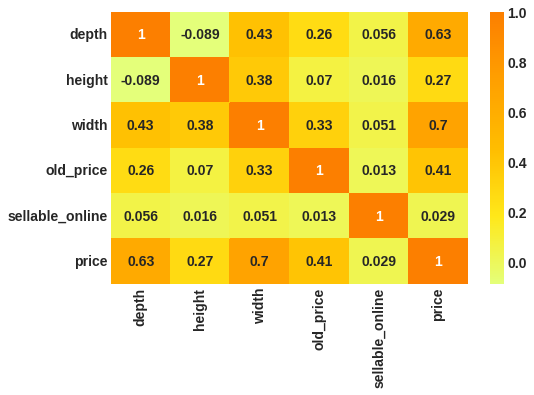

In [ ]:
corr = df_reg.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


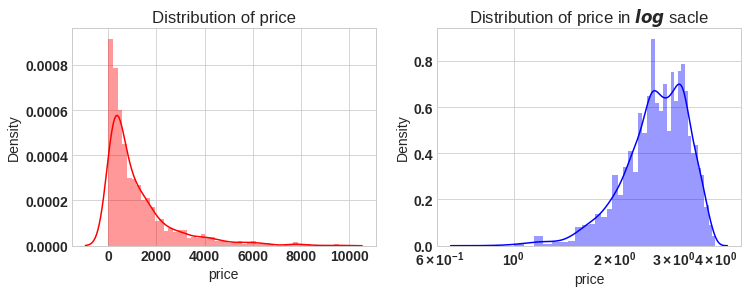

In [127]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df_reg['price'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of price')

ax=f.add_subplot(122)
sns.distplot(np.log10(df_reg['price']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of price in $log$ sacle')
ax.set_xscale('log');

We can see the distribution of the price of the product both in normal and log scale and in the log scale is sigghtly equal to normal distribution

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_reg['sellable_online'] = le.fit_transform(df_reg['sellable_online'])
df_reg['other_colors'] = le.fit_transform(df_reg['other_colors'])
df_reg['short_description'] = le.fit_transform(df_reg['short_description'])
df_reg['designer'] = le.fit_transform(df_reg['designer'])
df_reg['name'] = le.fit_transform(df_reg['name'])
df_reg['category'] = le.fit_transform(df_reg['category'])

df_reg

depth  height  width  old_price  sellable_online  other_colors  \
0      44.0   103.0   52.0          0                1             0   
1      45.0   102.0   40.0          0                1             0   
2      47.0   103.0   46.0          0                1             0   
3      53.0   104.0   43.0        295                1             0   
4      52.0   114.0   43.0          0                1             0   
...     ...     ...    ...        ...              ...           ...   
3538   50.0     NaN   91.0        820                1             0   
3539   50.0     NaN  135.0       1755                1             0   
3540   50.0     NaN  175.0       1050                1             0   
3541   50.0     NaN  178.0       3130                1             0   
3542   50.0     NaN  175.0       1535                1             0   

      short_description  designer  name  category   price  
0                   129       177   103         0   149.0  
1                   126         8   190         0   395.0  
2                   126       233   365         0   395.0  
3                   130       231   106         0   177.0  
4                   127        36    71         0   345.0  
...                 ...       ...   ...       ...     ...  
3538                  7        36    84        16   750.0  
3539                 20        36    84        16  1572.0  
3540                 23        36    84        16   924.0  
3541                 53        36    84        16  2745.0  
3542                 23        36    84        16  1231.0  

[3543 rows x 11 columns]

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

The above function is used to clean the data set by removing empty data and zero values in tha data set

In [69]:
clean_dataset(df_reg)
columns= ['depth', 'height',	'width',	'old_price',	'sellable_online',	'other_colors',	'short_description',	'designer',	'name',	'category']
from sklearn.model_selection import  train_test_split
X_reg = df_reg[columns]

y_reg = df_reg['price']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X_reg, y_reg, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)


## Creating the Linear regression model

In [ ]:

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)
     

LinearRegression()

In [ ]:

# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)
     

Mean squared error: 588928.11
Coefficient of determination: 0.72
R^2 score on tarining set = 0.7189138450549432


In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 495600.17
Coefficient of determination: 0.68
R^2 score on test set = 0.6802144164724364


In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
     

Mean squared error: 464782.66
Coefficient of determination: 0.79
R^2 score on validation set = 0.7915915599263147


In [ ]:

import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

From the above Permutation importance we can come to a conclusion that width and heigth of the product are more important feature for predicting the price of the product

#Interpretation:

In [ ]:
import statsmodels.api as sm

model = sm.OLS(df_reg['price'], df_reg[['depth', 'height',	'width',	'old_price',	'sellable_online',	'other_colors',	'short_description',	'designer',	'name',	'category']]).fit()

# Print out the statistics
model.summary()
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              981.7
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                        0.00
Time:                        21:24:31   Log-Likelihood:                         -14806.
No. Observations:                1841   AIC:                                  2.963e+04
Df Residuals:                    1831   BIC:                                  2.969e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
depth                16.9518      0.712     23.798      0.000      15.555      18.349
height                2.2523      0.325      6.922      0.000       1.614       2.890
width                 9.7803      0.281     34.782      0.000       9.229      10.332
old_price             0.1617      0.019      8.722      0.000       0.125       0.198
sellable_online   -1333.3073     70.558    -18.897      0.000   -1471.690   -1194.925
other_colors        118.0633     36.733      3.214      0.001      46.020     190.106
short_description     0.0988      0.037      2.650      0.008       0.026       0.172
designer             -0.4972      0.241     -2.063      0.039      -0.970      -0.025
name                  0.0326      0.111      0.294      0.769      -0.185       0.250
category              7.0170      3.946      1.778      0.076      -0.722      14.756
==============================================================================
Omnibus:                      398.904   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2125.367
Skew:                           0.913   Prob(JB):                         0.00
Kurtosis:                       7.937   Cond. No.                     4.62e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation:

b1=16.9518: It means that it will take 16.9518 more price if the product heigth increases by 1 unit, other variables remaining constant.

b2=2.2523: It means that it will take 2.2523 more price if the product heigth increases by 1 unit , other variables remaining constant.

b3=9.7803: It means that it will take 9.7803 more price if the product width increases by 1 unit , other variables remaining constant.

b4=0.1617: It means that it will take 0.1617 more price if the product old price increases by 1, other variables remaining constant.

b5=2.2523: It means that it will take 2.2523 more price to deliver if the product heigth increases by 1 unit , other variables remaining constant.


# Regression Trees and it Interpretation

Creating another data frame to differentiate the data frame for all the models and which will be clear while interpreting the model

In [ ]:
df_tree = pd.read_csv("/content/IKEA_SA_Furniture_Web_Scrapings_sss.csv")
print('\nNumber of rows and columns in the data set: ',df_tree.shape)
print('')

#Lets look into top few rows and columns in the dataset
df_tree.head()


Number of rows and columns in the data set:  (3543, 11)



depth  height  width  old_price  sellable_online other_colors  \
0   44.0   103.0   52.0          0             True           No   
1   45.0   102.0   40.0          0             True           No   
2   47.0   103.0   46.0          0             True           No   
3   53.0   104.0   43.0        295             True           No   
4   52.0   114.0   43.0          0             True           No   

                                   short_description              designer  \
0          Bar stool with backrest, foldable,    ...   K Hagberg/M Hagberg   
1            Bar stool with backrest,          74 cm          Carina Bengs   
2            Bar stool with backrest,          74 cm         Nike Karlsson   
3          Bar stool with backrest, in/outdoor,  ...  Nicholai Wiig Hansen   
4            Bar stool with backrest,          75 cm       Ehlén Johansson   

       name       category  price  
0  FRANKLIN  Bar furniture  149.0  
1    INGOLF  Bar furniture  395.0  
2  NORRARYD  Bar furniture  395.0  
3  FREKVENS  Bar furniture  177.0  
4  EKEDALEN  Bar furniture  345.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_tree['sellable_online'] = le.fit_transform(df_tree['sellable_online'])
df_tree['other_colors'] = le.fit_transform(df_tree['other_colors'])
df_tree['short_description'] = le.fit_transform(df_tree['short_description'])
df_tree['designer'] = le.fit_transform(df_tree['designer'])
df_tree['name'] = le.fit_transform(df_tree['name'])
df_tree['category'] = le.fit_transform(df_tree['category'])

df_tree

depth  height  width  old_price  sellable_online  other_colors  \
0      44.0   103.0   52.0          0                1             0   
1      45.0   102.0   40.0          0                1             0   
2      47.0   103.0   46.0          0                1             0   
3      53.0   104.0   43.0        295                1             0   
4      52.0   114.0   43.0          0                1             0   
...     ...     ...    ...        ...              ...           ...   
3532   60.0   201.0   75.0          0                1             1   
3533   55.0   216.0  164.0       1735                1             0   
3534   60.0   236.0  100.0          0                1             1   
3535   66.0   236.0  150.0          0                1             0   
3537   66.0   236.0  200.0          0                1             0   

      short_description  designer  name  category   price  
0                    93       104    60         0   149.0  
1                    90         5    98         0   395.0  
2                    90       129   169         0   395.0  
3                    94       127    61         0   177.0  
4                    91        17    43         0   345.0  
...                 ...       ...   ...       ...     ...  
3532                898        23   181        16  1260.0  
3533                 14        23    49        16  1245.0  
3534                884        61   180        16  2100.0  
3535                890        61   186        16  3985.0  
3537                894        61   188        16  2045.0  

[1841 rows x 11 columns]

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
clean_dataset(df_tree)
X = df_tree.drop(['depth', 'height',	'width',	'old_price',	'sellable_online',	'other_colors',	'short_description',	'designer',	'name',	'category'], axis=1)
y = df_tree["price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

##Building the DecisionTreeRegressor model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
print(predictions)

[  80.   235.   595.   661.  3355.    40.   345.  1850.   370.  6895.
  420.   115.   199.   445.   290.   745.  3215.  1900.   395.   595.
   95.   255.   295.   595.   480.  1590.   695.  4390.  2370.  1400.
 1245.   175.   435.  1345.   350.  1770.   500.  4345.   939.  3227.
  110.   345.   588.   500.   178.   945.  1000.  1995.   725.   295.
  175.  2792.8  129.   375.   399.   425.    30.  1400.  1035.   695.
  150.   425.  4645.  1075.   300.  1650.  1824.5 2500.  1356.  4841.
  225.   175.   770.   225.   620.  1991.   545.  4070.   410.   595.
 1245.   325.   675.   295.  3340.  2995.   825.   145.   195.   155.
  595.  1060.   110.  1155.   225.   570.   490.   175.  2700.  3115.
 1600.    59.  2792.8  250.   350.   320.   345.  2295.    15.   995.
  255.  6440.   399.  1300.  3905.  5995.  1000.  2650.   575.   155.
  795.    49.   450.  1750.   345.   645.  2190.  2320.   920.   645.
 2470.  1350.   580.  2275.   345.   225.   978.   425.  2770.   395.
 2710.  3540.  2500.

In [ ]:
model.score(X_test, y_test)

0.9999562939117805

From the above score we can see that we were able to achive even more accuracy while using tree based model and this is due to node depth and it forces the consideration of all possible outcomes of a decision and traces each path to a conclusion

#Auto ML for best model and its Interpretation


In [ ]:
!pip install auto-sklearn

In [40]:
import autosklearn

In [46]:
# Import dataset
#path ='dataset/'
path = '../input/'
df_auto = pd.read_csv("/content/IKEA_SA_Furniture_Web_Scrapings_sss.csv")
print('\nNumber of rows and columns in the data set: ',df_auto.shape)
print('')

#Lets look into top few rows and columns in the dataset
df_auto.head()


Number of rows and columns in the data set:  (3543, 11)



depth  height  width  old_price  sellable_online other_colors  \
0   44.0   103.0   52.0          0             True           No   
1   45.0   102.0   40.0          0             True           No   
2   47.0   103.0   46.0          0             True           No   
3   53.0   104.0   43.0        295             True           No   
4   52.0   114.0   43.0          0             True           No   

                                   short_description              designer  \
0          Bar stool with backrest, foldable,    ...   K Hagberg/M Hagberg   
1            Bar stool with backrest,          74 cm          Carina Bengs   
2            Bar stool with backrest,          74 cm         Nike Karlsson   
3          Bar stool with backrest, in/outdoor,  ...  Nicholai Wiig Hansen   
4            Bar stool with backrest,          75 cm       Ehlén Johansson   

       name       category  price  
0  FRANKLIN  Bar furniture  149.0  
1    INGOLF  Bar furniture  395.0  
2  NORRARYD  Bar furniture  395.0  
3  FREKVENS  Bar furniture  177.0  
4  EKEDALEN  Bar furniture  345.0

In [47]:
df_auto.dtypes

depth                float64
height               float64
width                float64
old_price              int64
sellable_online         bool
other_colors          object
short_description     object
designer              object
name                  object
category              object
price                float64
dtype: object

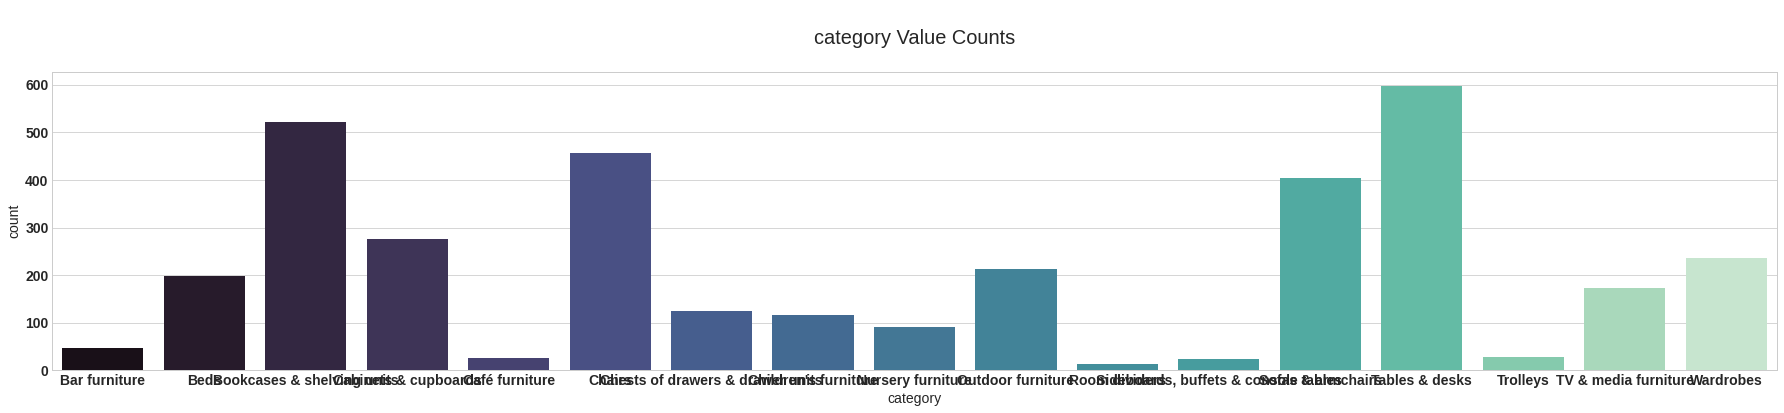

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from re import X
#Considering all the columns for ploting
columns= ['category']

plt.figure(figsize=(25,20))


#Ploting all the column using countplot to check ranges in numerical data and types in catagorical data
plotnumber = 1
for i in range(len(columns)):
    if plotnumber <= 4 :
      ax = plt.subplot(4,1,plotnumber)
      sns.countplot(x = columns[i],data = df_auto,ax = ax,palette='mako')
      plt.title(f"\n{columns[i]} Value Counts\n",fontsize = 20)
    plotnumber += 1

plt.tight_layout()
plt.show()


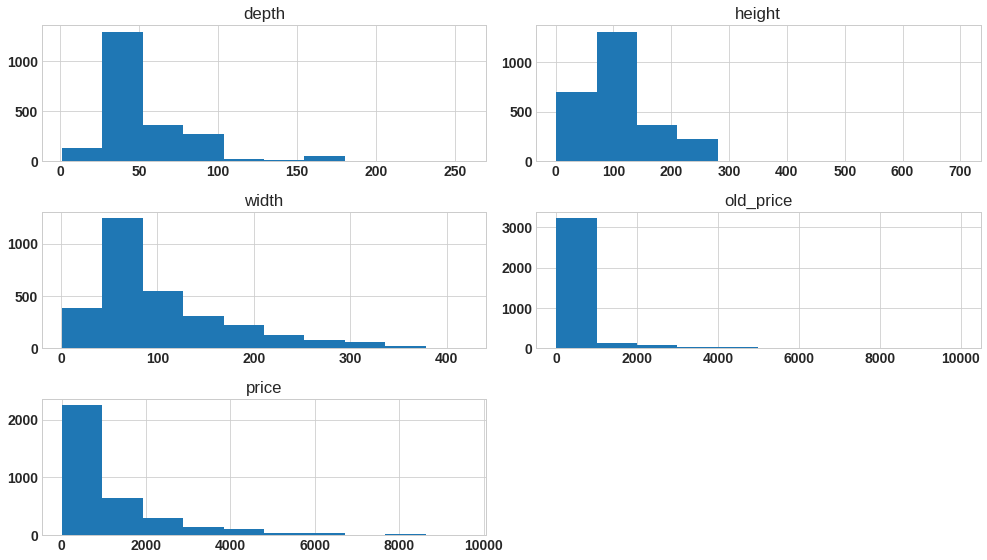

In [50]:
df_auto.hist(figsize=(14, 8))
plt.tight_layout()

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_auto['sellable_online'] = le.fit_transform(df_auto['sellable_online'])
df_auto['other_colors'] = le.fit_transform(df_auto['other_colors'])
df_auto['short_description'] = le.fit_transform(df_auto['short_description'])
df_auto['designer'] = le.fit_transform(df_auto['designer'])
df_auto['name'] = le.fit_transform(df_auto['name'])
df_auto['category'] = le.fit_transform(df_auto['category'])

df_auto

depth  height  width  old_price  sellable_online  other_colors  \
0      44.0   103.0   52.0          0                1             0   
1      45.0   102.0   40.0          0                1             0   
2      47.0   103.0   46.0          0                1             0   
3      53.0   104.0   43.0        295                1             0   
4      52.0   114.0   43.0          0                1             0   
...     ...     ...    ...        ...              ...           ...   
3538   50.0     NaN   91.0        820                1             0   
3539   50.0     NaN  135.0       1755                1             0   
3540   50.0     NaN  175.0       1050                1             0   
3541   50.0     NaN  178.0       3130                1             0   
3542   50.0     NaN  175.0       1535                1             0   

      short_description  designer  name  category   price  
0                   129       177   103         0   149.0  
1                   126         8   190         0   395.0  
2                   126       233   365         0   395.0  
3                   130       231   106         0   177.0  
4                   127        36    71         0   345.0  
...                 ...       ...   ...       ...     ...  
3538                  7        36    84        16   750.0  
3539                 20        36    84        16  1572.0  
3540                 23        36    84        16   924.0  
3541                 53        36    84        16  2745.0  
3542                 23        36    84        16  1231.0  

[3543 rows x 11 columns]

In [53]:
df_auto = df_auto.sample(frac=1, random_state=0)
df_auto.reset_index(drop=True, inplace=True)

split_index = int(len(df_auto) * 0.75)

train_df = df_auto[:split_index]
test_df = df_auto[split_index:]

train_df.head()

depth  height  width  old_price  sellable_online  other_colors  \
0   36.0     NaN   56.0          0                1             0   
1   60.0   236.0  200.0          0                1             0   
2   27.0   140.0   60.0          0                1             0   
3    NaN    73.0   75.0          0                1             0   
4    NaN     NaN   30.0          0                1             0   

   short_description  designer  name  category   price  
0                775        90    23         3    30.0  
1               1625       107   382        16  2960.0  
2               1036        90   171         2    84.0  
3               1419       124   124        14   795.0  
4                460        90   174        15    49.0

In [54]:
X_train = train_df.to_numpy()[:, :-1]
y_train = train_df.to_numpy()[:, -1]

X_test = test_df.to_numpy()[:, :-1]
y_test = test_df.to_numpy()[:, -1]

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((2657, 10), (2657,)), ((886, 10), (886,)))

In [55]:
feature_types = ['Numerical']*4 + ['Categorical']*6

feature_types

['Numerical',
 'Numerical',
 'Numerical',
 'Numerical',
 'Categorical',
 'Categorical',
 'Categorical',
 'Categorical',
 'Categorical',
 'Categorical']

In [56]:
import autosklearn.regression

autosklearn_regressor = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=240,
    per_run_time_limit=60,
)

autosklearn_regressor.fit(X_train, y_train, feat_type=feature_types)

AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=60, time_left_for_this_task=240)

In [58]:
print(autosklearn_regressor.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
9            1             0.42  gradient_boosting  0.202515   2.351204
2            2             0.12      random_forest  0.205485   5.978999
10           3             0.32      random_forest  0.208987  34.630527
3            4             0.04  gradient_boosting  0.287358  10.560622
5            5             0.10        extra_trees  0.307494   3.489279


In [59]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_train, autosklearn_regressor.predict(X_train)), mae(y_test, autosklearn_regressor.predict(X_test))

(241.62470348455636, 335.5951593507998)

In [62]:

import PipelineProfiler
profiler_data = PipelineProfiler.import_autosklearn(autosklearn_regressor)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

#Shap Analysis for Linear Reggression model Interpretation

In [ ]:
!pip install shap

In [93]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap

shap.initjs()

In [94]:
corpus,y = shap.datasets.imdb()
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=7)

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)

In [96]:
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)


LogisticRegression(C=0.1)

In [97]:
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)
X_test_array = X_test.toarray()

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


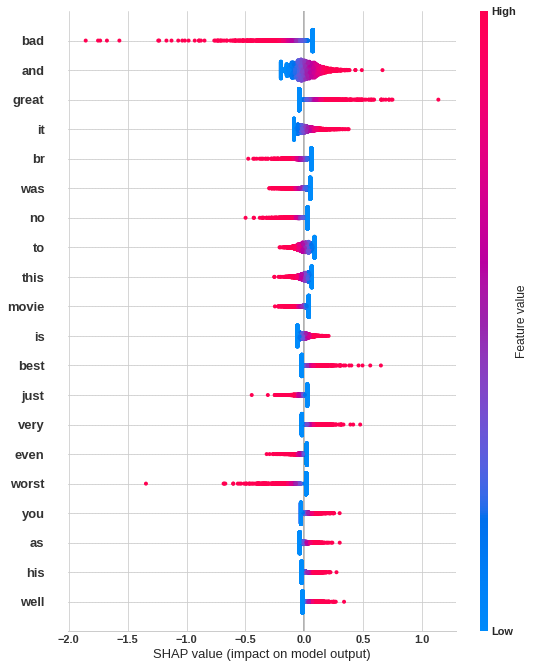

In [98]:
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names())

#Shap Analysis for Tree based model Interpretation


In [102]:
import numpy as np
import scipy as sp
import xgboost
import shap
import sklearn
from sklearn.model_selection import train_test_split

In [103]:
N = 10000
M = 10
np.random.seed(0)
X = np.random.randn(N,M)
beta = np.random.randn(M)
y_margin = X @ beta
y = y_margin

X_train,X_test,y_train,y_test = train_test_split(X, y)
X_strain,X_valid,y_strain,y_valid = train_test_split(X_train, y_train)

In [104]:
model_depth1 = xgboost.XGBRegressor(max_depth=1, learning_rate=0.01, subsample=0.5, n_estimators=10000, base_score=y_strain.mean())
model_depth1.fit(X_strain, y_strain, eval_set=[(X_valid,y_valid)], eval_metric="logloss", verbose=1000, early_stopping_rounds=20)

[22:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-logloss:-1.7461
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1000]	validation_0-logloss:-45.7089
Stopping. Best iteration:
[1069]	validation_0-logloss:-45.9397



XGBRegressor(base_score=0.013271975120564432, learning_rate=0.01, max_depth=1,
             n_estimators=10000, subsample=0.5)

In [105]:
model_depth3 = xgboost.XGBRegressor(learning_rate=0.02, subsample=0.2, colsample_bytree=0.5, n_estimators=5000, base_score=y_strain.mean())
model_depth3.fit(X_strain, y_strain, eval_set=[(X_valid,y_valid)], eval_metric="logloss", verbose=500, early_stopping_rounds=20)

[22:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-logloss:-22.5248
Will train until validation_0-logloss hasn't improved in 20 rounds.
[500]	validation_0-logloss:-48.9486
Stopping. Best iteration:
[867]	validation_0-logloss:-49.2267



XGBRegressor(base_score=0.013271975120564432, colsample_bytree=0.5,
             learning_rate=0.02, n_estimators=5000, subsample=0.2)

In [106]:
shap_values = shap.TreeExplainer(model_depth1).shap_values(X_test)
shap_interaction_values = shap.TreeExplainer(model_depth1).shap_interaction_values(X_test)

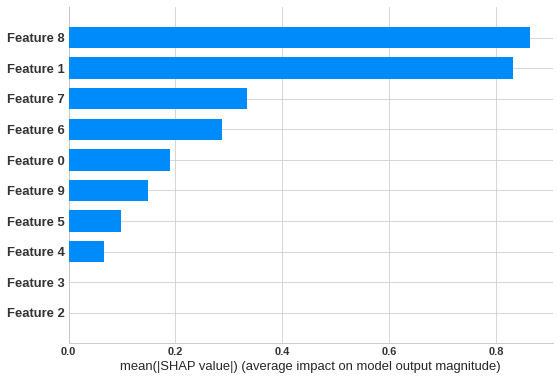

In [107]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

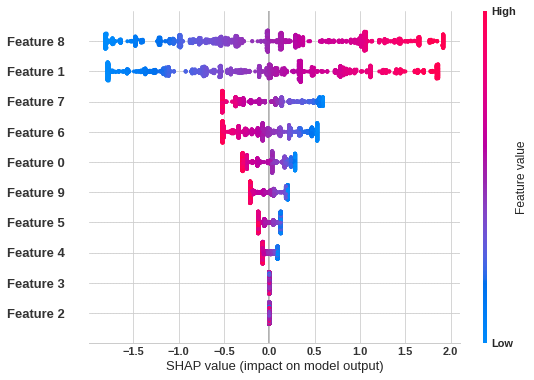

In [108]:
shap.summary_plot(shap_values, X_test)

invalid value encountered in true_divide
invalid value encountered in true_divide


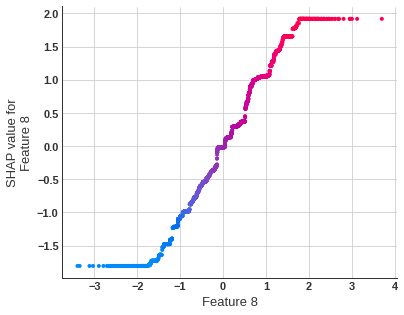

In [109]:
shap.dependence_plot(8, shap_values, X_test)

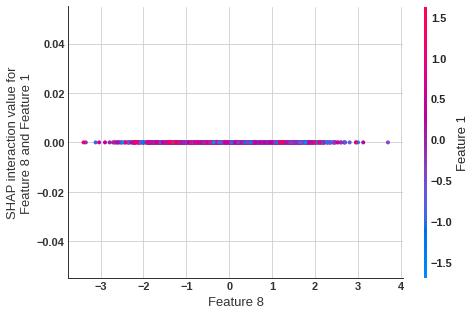

In [110]:
shap.dependence_plot((8,1), shap_interaction_values, X_test)

invalid value encountered in true_divide
invalid value encountered in true_divide


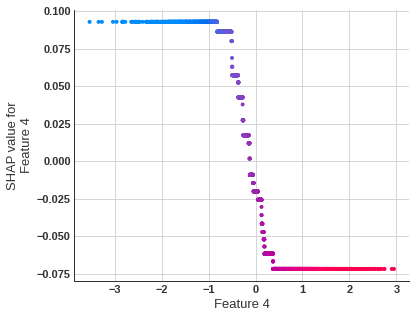

In [111]:
shap.dependence_plot(4, shap_values, X_test)


#Shap Analysis for Model Interpretation from Auto ML

In [112]:
e3 = shap.TreeExplainer(model_depth3)
shap_values3 = e3.shap_values(X_test)
shap_interaction_values3 = shap.TreeExplainer(model_depth3).shap_interaction_values(X_test)


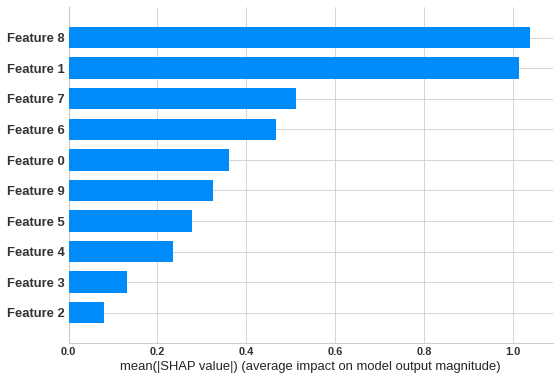

In [113]:
shap.summary_plot(shap_values3, X_test, plot_type="bar")

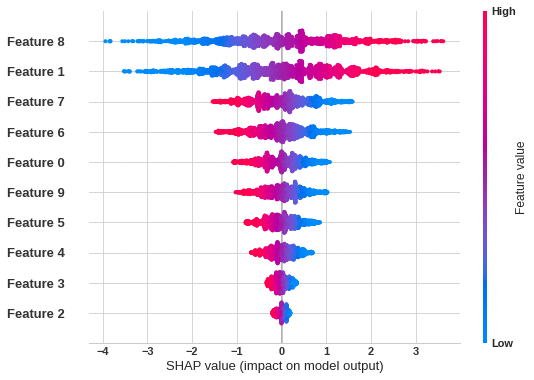

In [114]:
shap.summary_plot(shap_values3, X_test)

In [118]:
e3 = shap.TreeExplainer(model_depth3)
t = e3.shap_values(X_test)

In [126]:
shap.initjs()
shap.force_plot(e3.expected_value, shap_values[0,:], X_test[0,:])

In [125]:
shap.initjs()
shap.force_plot(e3.expected_value, shap_values[0:500,:], X_test[0:500,:])

#Conclusion



*   Firstly fitted a linaer reggression model to predict the price of the products and I was able to interpret the model using OLS Regression Results.
*   Secondly fitted a tree based regression model to predict the prices of the products and I was able to see the difference in accuracy of the model by 10%
*   Used Auto ML find the best model to predict the prices of the products and interpret the model using PipelineProfiler
*   Used SHAP analysis for the further interpreting the gradient booster model which was the best model given my sklearn automl 
*   Finally size of the product was important independent variable which was mostly correalted to the target variable price of the product.










#References
Refered the following links to understand the functions

1. Auto-Sklearn Documentation

2. Pandas Official Documentation

3. SHAP Documentation

4. Seaborn: statistical data visualization


Copyright 2022 Prem kumar Raghava Manoharan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.